In [4]:
import networkx as nx
from operator import add, sub
import numpy as np
import matplotlib.pyplot as plt
from python.SpringRank import SpringRank
import python.tools as tl
import copy
import random

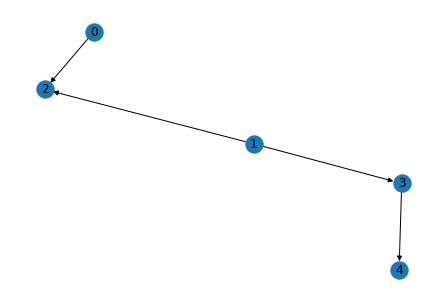

In [5]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(0, 2, 1), (1, 2, 1), (1, 3, 2), (3, 4, 1)])
nx.draw(DG, with_labels=True)


In [13]:
def get_space_ranks(graph, self_edge_weight = 1, with_rounding = False, min_iter = 1000, print_rate = 100, max_iter = 10000):
    #intialise dictionary
    # this creates potential issues - are the orders the same in both results???:
    node_page = {}
    for node in list(graph.nodes()):
        node_page[node] = {}

    #calculating what each nodes page will look like
    i = 0
    while True:
        i = i+1
        change = 0
        for node in list(graph.nodes()):
            #The sum on the weights coming in:
            norm_const = 1/(graph.in_degree(node, weight='weight')+self_edge_weight)
            #setting up the new dictionary
            new_page_draft = {}
            new_page_draft[node] = norm_const

            #for each superior node - node that is predecessor
            for superior in list(graph.predecessors(node)):
                #get the weight of the superiors influence
                edge_weight = graph.get_edge_data(superior, node)["weight"]

                #add weight time its page(dictionary) to the current nodes dictionary
                for entry in node_page[superior].keys():
                    new_page_draft[entry] = new_page_draft.get(entry, 0) + edge_weight*(norm_const)*node_page[superior][entry]

            node_page[node] = new_page_draft

        if i%print_rate == 0:
            print("Currently at iteration ", i)

        if (i>max_iter): # (i>min_iter and abs(change) < 1) or (i>max_iter):
            #print("stopped at iteration:", i)
            break

    ranking = {}
    for node in list(graph.nodes()):
        current_node_page = node_page[node]
        for entry in current_node_page.keys():
            ranking[entry] = ranking.get(entry, 0) + current_node_page[entry]

    return ranking, node_page

In [14]:
graph_space_ranks, node_page = get_space_ranks(DG, with_rounding = True, min_iter=1, print_rate=1, max_iter=4)

Currently at iteration  1
Currently at iteration  2
Currently at iteration  3
Currently at iteration  4
Currently at iteration  5


In [15]:
graph_space_ranks


{0: 1.3333333333333333,
 2: 0.3333333333333333,
 1: 2.3333333333333335,
 3: 0.5,
 4: 0.5}

In [16]:
node_page

{0: {0: 1.0},
 2: {2: 0.3333333333333333, 0: 0.3333333333333333, 1: 0.3333333333333333},
 1: {1: 1.0},
 3: {3: 0.3333333333333333, 1: 0.6666666666666666},
 4: {4: 0.5, 3: 0.16666666666666666, 1: 0.3333333333333333}}

In [22]:
graph_page_rank_dict = nx.pagerank(DG, alpha=0.9)

In [23]:
graph_page_rank_dict

{0: 0.12135934890440611,
 2: 0.2669898998765222,
 1: 0.12135934890440611,
 3: 0.19417462439046415,
 4: 0.29611677792420166}